<a href="https://colab.research.google.com/github/lcbjrrr/genai/blob/main/01_RAG_WVec_LLM_GCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP)

## Embeddings and Tokenization

Natural Language Processing (NLP) is a field dedicated to enabling computers to understand, interpret, and generate human language. A cornerstone of modern NLP is the use of **embeddings**, which are numerical representations of words or phrases that capture their semantic meaning, allowing algorithms to process linguistic data effectively. Building upon these foundations, **Large Language Models (LLMs)** represent a significant advancement, utilizing vast datasets and sophisticated architectures to understand context, generate coherent text, and perform a wide array of language-based tasks.

In [ ]:
!pip install spacy gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 66.3 MB/s eta 0:00:00


Word2Vec is a technique used in natural language processing to generate word embeddings. It represents words as dense vectors in a continuous vector space, where words with similar meanings are located closer to each other. This is achieved by analyzing the context in which words appear in a large corpus of text.

In [ ]:
%%time
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format("http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.txt.bz2", binary=False,unicode_errors='ignore' )

**Embeddings** are numerical representations of real-world objects, such as words, images, or entire documents. In the context of natural language processing, word embeddings are vectors that capture semantic relationships between words, allowing algorithms to process and understand human language more effectively.

![](https://towardsdatascience.com/wp-content/uploads/2020/06/1HOvcH2lZXWyOtmcqwniahQ.png)

In [ ]:
embed = word_vectors['generative']
embed

array([-0.1944,  0.3173, -0.6029, -0.2289, -0.159 , -0.6233,  0.1637,
        0.4812,  0.3664, -0.4371,  0.4014,  0.356 , -0.4489, -0.1209,
        0.1787, -0.4777,  0.4284, -0.5101,  0.574 , -0.4029,  0.2346,
        0.0616, -0.5732, -0.5495,  0.0648, -0.5697,  0.3056,  0.0199,
        0.4866,  0.5387,  0.1568,  0.2029,  0.9879,  0.3328,  0.6987,
        0.314 , -0.271 , -0.2186,  0.2244,  0.0273, -0.1938,  0.2384,
       -0.3099,  0.5102,  0.2235, -0.1594, -0.8178, -0.014 , -0.4044,
        0.1803,  0.2592,  0.1052, -0.0816,  0.06  , -0.0441, -0.3898,
       -0.6213,  0.2516, -0.2886,  0.7391, -0.2618,  0.4155, -0.4727,
        0.785 ,  0.7197, -0.0754, -0.4997,  0.1545, -0.8258, -0.7265,
        0.3349,  0.1798, -0.5484, -0.2569,  0.0863, -0.4086, -0.8779,
        0.3763,  0.3226,  0.641 , -1.3968,  0.0903,  0.3317, -0.7599,
       -0.1855,  0.7091, -0.2894, -0.1777,  0.3832, -0.3214,  0.0448,
       -0.0806, -0.5196,  0.3394,  0.4149, -0.3964,  0.5066,  0.3642,
       -0.3679,  0.2

In [ ]:
word_vectors.most_similar("generative")

[('lexicalist', 0.779882550239563),
 ('chomskyan', 0.7596522569656372),
 ('connectivist', 0.7340349555015564),
 ('neuroaesthetics', 0.729445219039917),
 ('generativist', 0.7284153699874878),
 ('homuncular', 0.7270619869232178),
 ('ENTITY/Glue_semantics', 0.7268419861793518),
 ('meinongian', 0.7229824066162109),
 ('metasystems', 0.720165491104126),
 ('ENTITY/Constraint-based_grammar', 0.7194753289222717)]

**Tokens** are the fundamental building blocks of text data in natural language processing. They are discrete units derived from a larger body of text, typically words, punctuation marks, or subword units (like 'ing' or 'un'). This process of breaking down text into tokens is called tokenization and is a crucial first step for most NLP tasks, as models often operate on these individual tokens rather than raw text.

In [ ]:
import numpy as np
def calc_embeddings(tokens):
  #the mean of the words in the sentence as the vector rep of it
  return  np.mean(np.array([word_vectors[t] for t in tokens if t in word_vectors.key_to_index]), axis=0)

In [ ]:
sentences = ['IA: Artificial Intelligence is the broad, overarching field dedicated to creating machines that can simulate human intelligence and perform tasks like reasoning and problem-solving.',
'ML: Machine Learning is a subset of AI where systems learn from data to identify patterns and make predictions without being explicitly programmed for every task.',
'DL: Deep Learning is a specialized form of ML that uses deep neural networks, inspired by the human brain, to automatically process complex, unstructured data like images, audio, and language.',
'GenAI: Generative AI is a branch of AI and type of DL model specifically designed to create new, original content, such as text, images, or code, based on the patterns it learned during training.',
'LLMs: Large Language Models are a specific and prominent type of generative AI model that are trained on vast amounts of text data to understand, interpret, and generate human-like language.']

In [ ]:
print(sentences[0])
tokens = sentences[0].split(' ')
print(tokens)
calc_embeddings(tokens)

IA: Artificial Intelligence is the broad, overarching field dedicated to creating machines that can simulate human intelligence and perform tasks like reasoning and problem-solving.
['Artificial', 'Intelligence', 'is', 'the', 'broad,', 'overarching', 'field', 'dedicated', 'to', 'creating', 'machines', 'that', 'can', 'simulate', 'human', 'intelligence', 'and', 'perform', 'tasks', 'like', 'reasoning', 'and', 'problem-solving.']


array([-0.01807368,  0.16352107, -0.15188423,  0.07623159, -0.08888421,
       -0.20527896,  0.10365262,  0.02830527,  0.11858946, -0.22463684,
        0.04217368, -0.20571578,  0.19375263, -0.14140527,  0.32829472,
       -0.33084735, -0.06887895, -0.26750526, -0.00831579, -0.02776317,
       -0.05177368, -0.01493158, -0.09573158,  0.04466842, -0.17360526,
       -0.2861684 , -0.20236316, -0.1854579 ,  0.19154736,  0.39044213,
        0.25146842,  0.03066842,  0.02402631,  0.29369473,  0.16242105,
       -0.12049475, -0.01683684, -0.05483686,  0.18093683, -0.0306    ,
        0.00796316,  0.03291053, -0.21464737,  0.03662105, -0.1074    ,
       -0.28423157, -0.10834736,  0.14964211, -0.2059    , -0.02927895,
       -0.15419473,  0.16150525,  0.00641578,  0.16225262,  0.07394737,
       -0.02751579, -0.23002635, -0.04693684, -0.05505789,  0.21131054,
       -0.14008947, -0.13240527, -0.24106315,  0.22333685,  0.49372637,
       -0.25698423, -0.3175947 , -0.2712526 , -0.23358947, -0.42

In [ ]:
embeddings = np.array([calc_embeddings(v.split(' ')) for v in sentences])
embeddings.shape

(5, 100)

*Clustering* is a machine learning technique that groups similar data points together into clusters, such that items within a cluster are more similar to each other than to those in other clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3 )
clusters = kmeans.fit_predict(embeddings)
for i in range(0,5,1):
  print(clusters[i],sentences[i])

2 Artificial Intelligence is the broad, overarching field dedicated to creating machines that can simulate human intelligence and perform tasks like reasoning and problem-solving.
0 Machine Learning is a subset of AI where systems learn from data to identify patterns and make predictions without being explicitly programmed for every task.
0 Deep Learning is a specialized form of ML that uses deep neural networks, inspired by the human brain, to automatically process complex, unstructured data like images, audio, and language.
1 Generative AI is a branch of AI and type of DL model specifically designed to create new, original content, such as text, images, or code, based on the patterns it learned during training.
1 Large Language Models (LLMs) are a specific and prominent type of generative AI model that are trained on vast amounts of text data to understand, interpret, and generate human-like language.


*Principal Component Analysis (PCA)* is a dimensionality reduction technique that transforms a dataset of possibly correlated variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variability as possible.

[[ 0.46062785  0.18003269]
 [ 0.09294321 -0.11400206]
 [ 0.01019943 -0.26278165]
 [-0.3135061   0.32276726]
 [-0.25026438 -0.12601623]]


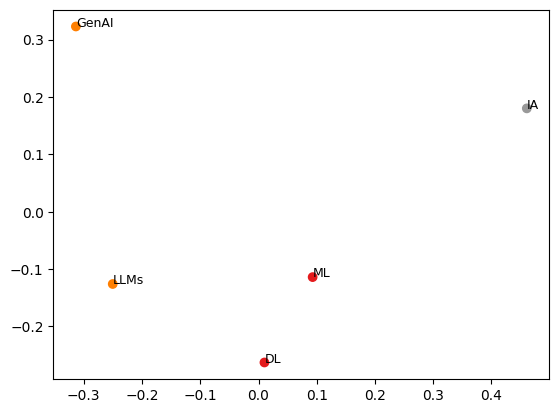

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduc_embe = pca.fit_transform(embeddings)
print(reduc_embe)
i=0
for v in [o.split(':')[0] for o in sentences]:
  plt.text(reduc_embe[i, 0], reduc_embe[i, 1], v, fontsize=9, ha='left')
  i=i+1
plt.scatter(x=reduc_embe[:, 0], y=reduc_embe[:, 1], c=clusters,cmap='Set1')

## GenAI: LLMs

Generative AI represents a significant advancement, allowing the creation of original and diverse content, such as texts, images, and audio, promising to transform industries by automating creative processes and offering new tools for innovation. The training of these models is based on exposure to vast amounts of data relevant to the desired content, using neural network architectures. Furthermore, the process of creating and refining the inputs provided to a language model to obtain desired responses is crucial for effectively directing the generative capacity of AI.

![](https://pbs.twimg.com/media/G5XShNuWsAA_sWo?format=jpg&name=medium)

Large Language Models (LLMs) are a highly advanced class of generative AI models built upon the principles of **Deep Learning**. They primarily utilize sophisticated **neural networks**, which are computational architectures inspired by the human brain, characterized by multiple layers that enable them to learn complex patterns from data. The most prevalent architecture within LLMs today is the **transformer** model, which excels at processing sequential data like text by employing attention mechanisms to weigh the importance of different parts of the input. This combination allows LLMs to process vast amounts of text, understand context, and generate human-like language for a wide array of tasks, from translation and summarization to creative writing and question answering.

![](https://pbs.twimg.com/media/G5XS8P4WUAAYvO2?format=jpg&name=medium)

In LLMs (especially Transformers):

*   **Encoder:** Reads and understands the input text, converting it into a rich numerical representation.

*   **Decoder:** Uses this representation to generate the output text, predicting one word at a time based on the input and previously generated words.

Some LLMs are purely decoder-based but still perform these two core functions.

![](https://pbs.twimg.com/media/G5XTWbcWAAA85ry?format=jpg&name=medium)

## OLD

In [ ]:
#!pip install google-generativeai
# import google.generativeai as genai
# import os

# GCP_MODEL = 'gemini-2.5-flash'
# os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

# genai.configure(api_key=GOOGLE_API_KEY)

# model = genai.GenerativeModel(GCP_MODEL)

# response = model.generate_content(
#     contents="Explain large language models in one sentence."
# )
# print(response.text)

## OK

### Gemini

In [ ]:
!pip install google-genai


In [ ]:
import os
GCP_MODEL = 'gemini-2.5-flash'
GOOGLE_API_KEY = 'your key'
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [ ]:

from google import genai
client = genai.Client()
response = client.models.generate_content(
    model=GCP_MODEL,
    contents="Explain large language models in one sentence."
)
print(response.text)

In [ ]:
#!pip install google-genai

In [ ]:
import os
from google import genai
from google.genai import types

SYSTEM_INSTRUCTION = 'You are a GenAI expert. That will explain concepts to a layman audience'

client = genai.Client()
question='What is the difference from Deep Learning?'

config = types.GenerateContentConfig(
    system_instruction=SYSTEM_INSTRUCTION,
    temperature=0.9,  #(0.0=deterministic, 2.0=highly creative)
    max_output_tokens=1000)

initial_history = [
    types.Content(role="user",parts=[types.Part(text="In a sentence, what are LLMs?")]),
    types.Content(role="model",parts=[types.Part(text="LLMs are advanced AI systems trained on vast amounts of text data to understand prompts and generate human-like.")])
  ]

chat = client.chats.create(
        model=GCP_MODEL,
        history=initial_history,
        config=config)

response = chat.send_message(question)
print(f"Model: {response.text}")

Model: Deep Learning is the *broader set of techniques* (like an engine technology) that allows AI to learn complex patterns from data, while LLMs are a *specific, highly specialized type of AI model* (like a particular type of vehicle) that uses those deep learning techniques specifically to understand and generate human language.

So, Deep Learning is the *how*, and LLMs are a *what* that uses that *how*.


# LLMs Orchestration

**LangChain** significantly streamlines the development of Retrieval Augmented Generation (RAG) solutions by providing a structured framework to orchestrate its multiple steps. It simplifies the entire process by offering various connectors and components for each stage: from integrating with diverse data sources (databases, documents, APIs) and performing efficient data retrieval (using vector databases and sophisticated indexing techniques), to formulating intelligent prompts and seamlessly feeding the retrieved context into Large Language Models (LLMs) for generating coherent and contextually relevant responses. This modular approach allows developers to easily swap out components, experiment with different strategies, and build complex RAG pipelines with reduced boilerplate code.

In [ ]:
!pip install langchain langchain-core langchain-google-genai

In [ ]:
import os
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sys_msg = 'You are a GenAI expert. That will explain concepts to a layman audience'
prompt_question = "In a sentence, what is the difference from Deep Learning?"

prompt_template = ChatPromptTemplate.from_messages([
        ("system", sys_msg),
        ("human", "In a sentence, what are LLMs"),
        ("ai", "LLMs are advanced artificial intelligence systems trained on vast amounts of text data to understand and generate human-like language."),
        ("human", "{question}")
])

llm = ChatGoogleGenerativeAI(
    model=GCP_MODEL,
    temperature=0.9,
    max_tokens=1000,
    google_api_key=GOOGLE_API_KEY
)

output_parser = StrOutputParser()

# Create the chain using the | operator
chain = prompt_template | llm | output_parser

response = chain.invoke({"question": prompt_question})
print(response)

Deep Learning is a broader AI technique that uses complex, multi-layered networks to learn from data, while LLMs are a specific type of model built using this technique, specifically designed to process and generate human language.
